## Notebook for testing code and plots

This is a notebook where code is tested for the project in the Advanced Scientific Python Programming course. The code includes e.g. functions for two-dimensional Gaussian fitting and scripts for various visualizations of the fit. This type of analysis is applied to both generated data and to fluorescent dots in microscopy images.

In [50]:
import numpy as np
import scipy.optimize as opt
%matplotlib inline
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

## Testing Gaussian function plotting

In [51]:
x = np.linspace(0, 14, 15)
y = np.linspace(0, 14, 15)
im = np.array(np.meshgrid(x,y))
sigmax, sigmay = 2, 2
amp = 3
background = 10
x0, y0 = 7, 7

X, Y = np.meshgrid(x, y)
fit = amp*np.exp(-((X-x0)**2/(2*sigmax**2) + (Y-y0)**2/(2*sigmay**2)))+background


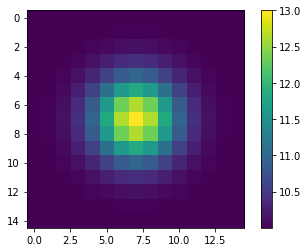

In [52]:
fig, ax = plt.subplots()
pos = ax.imshow(fit)
fig.colorbar(pos)

In [53]:
import matplotlib.pyplot as plt

def plot_fit_projections(im, ax, ax_plotx, ax_ploty):
    """Plots an image and its projections along the x- and y-axis
    
    Parameters
    ----------
    im : ndarray
        image to plot
    ax : `~matplotlib.axes.Axes`
        axes to plot the image in
    ax_plotx : `~matplotlib.axes.Axes`
        axes for the x-axis projection
    ax_ploty : `~matplotlib.axes.Axes`
        axes for the y-axis projection
    
    """
    # remove axis labels
    ax_plotx.tick_params(axis="x", labelbottom=False)
    ax_ploty.tick_params(axis="y", labelleft=False)

    # plot the image
    ax.imshow(im)
    
    # plot projections of the Gaussian fit along the x and y axes
    ax_plotx.plot(im.sum(axis=0)/im.shape[0])
    ax_ploty.plot(im.sum(axis=1)/im.shape[1], np.arange(0, im.shape[0]))
    

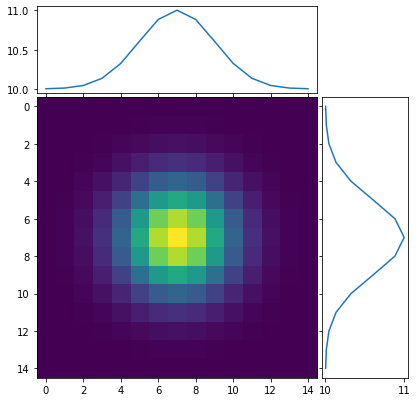

In [54]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.010 

rect_mid = [left, bottom, width, height]
rect_plotx = [left, bottom + height + spacing, width, 0.2]
rect_ploty = [left + width + spacing, bottom, 0.2, height]

fig = plt.figure(figsize=(6, 6))

ax = fig.add_axes(rect_mid)
ax_plotx = fig.add_axes(rect_plotx, sharex=ax)
ax_ploty = fig.add_axes(rect_ploty, sharey=ax)

ax = plot_fit_projections(fit, ax, ax_plotx, ax_ploty)

plt.show()


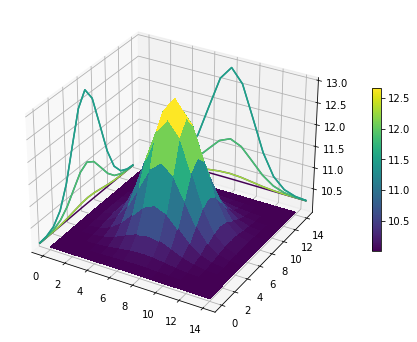

In [55]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(14,6))

# surface_plot with color grading and color bar for the Gaussian fit
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_surface(X, Y, fit, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

cset = ax.contour(X, Y, fit, zdir='x', offset=-1, cmap=cm.viridis)
cset = ax.contour(X, Y, fit, zdir='y', offset=fit.shape[0]+1, cmap=cm.viridis)

## Testing Gaussian fitting

In [56]:
def gaussian2DFit(XY, x0, y0, sigmax, sigmay, amp, background):
    """Two-dimensional Gaussian function, returned as a one-dimensional array."""
    
    X, Y = XY 
    fit = amp*np.exp(-((X-x0)**2/(2*sigmax**2) + (Y-y0)**2/(2*sigmay**2)))+ background
    
    return fit.ravel()

In [57]:
x = np.linspace(0, 14, 20)
y = np.linspace(0, 14, 20)
X, Y = np.array(np.meshgrid(x,y))
fit = np.array(gaussian2DFit((X,Y), 7, 7, 4, 2, 10, 10))


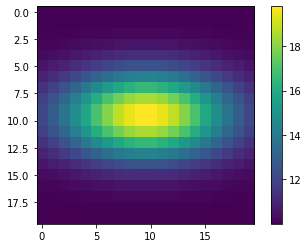

In [58]:
fig, ax = plt.subplots()
pos = ax.imshow(fit.reshape(20, 20))
fig.colorbar(pos)

In [59]:
XY = np.vstack((X.ravel(), Y.ravel()))
fit_noise = fit + 0.2*np.random.normal(size=fit.size) #later switch this to an actual image, and image.ravel() for the fit
init_guess = np.array([7, 7, 4, 2, 10, 10])
opt_param, cov_param = opt.curve_fit(gaussian2DFit, XY, fit_noise.ravel(), p0 = init_guess)

In [60]:
fit_opt = np.array(gaussian2DFit((X, Y), opt_param[0], opt_param[1], opt_param[2], opt_param[3], opt_param[4], opt_param[5]))

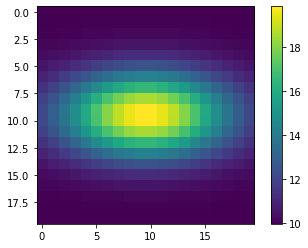

In [61]:
fig, ax = plt.subplots()
pos = ax.imshow(fit_opt.reshape(20, 20))
fig.colorbar(pos)

## Read images and apply the above fitting and plotting

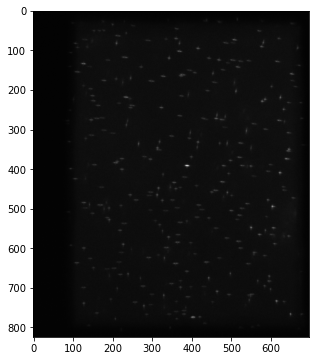

In [62]:
fig, ax = plt.subplots(figsize=(14,6))
im = plt.imread("./zStack_3D/img_125.tif")
ax.imshow(im[:, int(im.shape[1]/2):], cmap="gray")


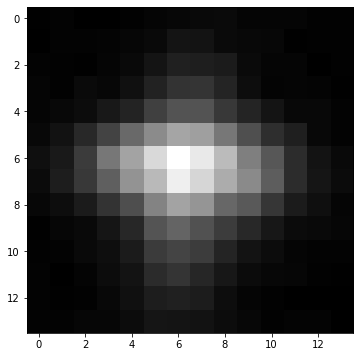

In [63]:
#pick out a specific fluorescent bead dot  
fig, ax = plt.subplots(figsize=(14,6))
im = plt.imread("./zStack_3D/img_121.tif")
x0, y0 = 1085, 392
ax.imshow(im[y0-7:y0+7, x0-7:x0+7] , cmap="gray")

In [64]:
im = im[y0-7:y0+7, x0-7:x0+7]


In [65]:
import numpy as np
import scipy.optimize as opt

def gaussian2DFit(XY, x0, y0, sigmax, sigmay, amp, background):
        """Two-dimensional Gaussian function, returned as a
        one-dimensional array
        
        Parameters
        ----------
        XY : ndarray
            matrix to fit the Gaussian function
        x0 : int, float
            x-coordinate of a centroid
        y0 : int, float
            y-coordinate of a centroid
        sigmax : int, float
            standard deviation of the Gaussian function along the x-axis
        sigmay : int, float
            standard deviation of the Gaussian function along the y-axis
        amp : float
            amplitude of the Gaussian function
        background : float
            background signal in the matrix to be fit
        
        Returns
        ----------
        ndarray
            Gaussian function evaluated with the given parameters
        
        """
        X, Y = XY
        fit = amp*np.exp(-((X-x0)**2/(2*sigmax**2) + (Y-y0)**2/(2*sigmay**2)))+background

        return fit.ravel()


def getFitParam(im):
        """Get the amplitude, x-coordinate, y-coordinate, sigma in x,
        sigma in y and background  of the Gaussian function based on
        non-linear least squares fitting
        
        Parameters
        ----------
        im : ndarray
            matrix to fit the Gaussian function and estimate the fit parameters for
        
        Returns
        ----------
        ndarray
            array of two-dimensional Gaussian fit parameters
        """
        x = np.linspace(0, im.shape[1], im.shape[1])
        y = np.linspace(0, im.shape[0], im.shape[0])
        X, Y = np.meshgrid(x, y)
        XY = np.vstack((X.ravel(), Y.ravel()))
        init_guess = (im.shape[1]/2, im.shape[0]/2, 2, 2, 500, 0)

        param_opt, param_cov = opt.curve_fit(gaussian2DFit, XY, im.ravel(), p0 = init_guess)

        return param_opt

In [66]:
param_opt = getFitParam(im)
param_opt

array([   6.77833175,    6.98437972,    2.52664224,    1.82679299,
       1073.60272245,  160.53091877])

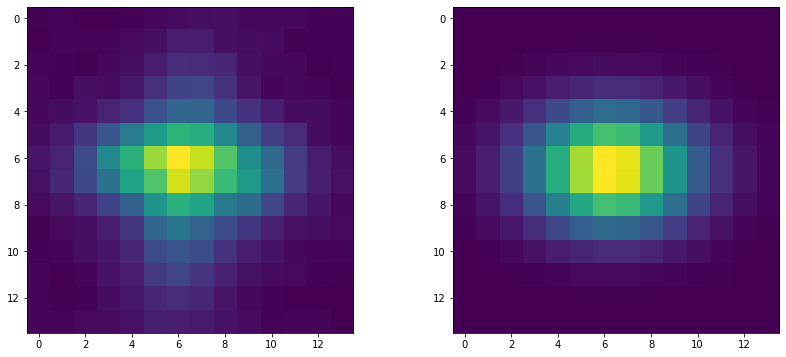

In [67]:
# compare image and Gaussian fit
X, Y = np.meshgrid(np.linspace(0, im.shape[0], im.shape[0]), np.linspace(0, im.shape[1], im.shape[1]))

im_fit = np.array(gaussian2DFit((X,Y), param_opt[0], param_opt[1], param_opt[2], param_opt[3], param_opt[4], param_opt[5]))
fig, ax = plt.subplots(1, 2, figsize=(14,6))
ax[0].imshow(im)
ax[1].imshow(im_fit.reshape(14,14))

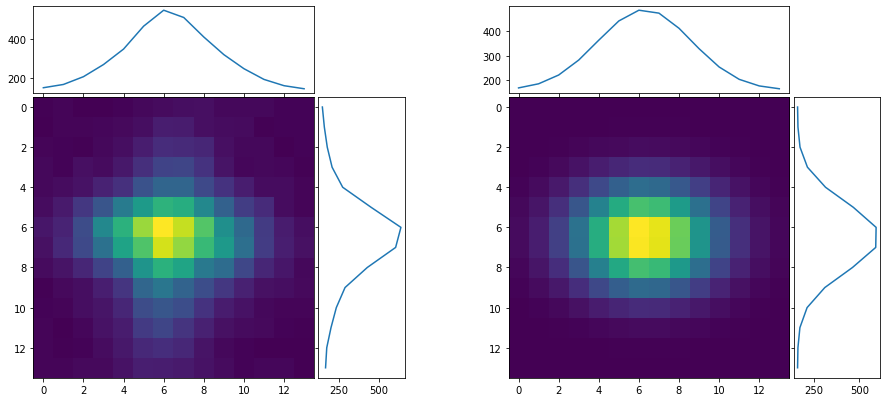

In [68]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.010 

rect_mid = [left, bottom, width, height]
rect_plotx = [left, bottom + height + spacing, width, 0.2]
rect_ploty = [left + width + spacing, bottom, 0.2, height]

fig = plt.figure(figsize=(6, 6))

#plot the image
ax = fig.add_subplot(1, 2, 1, position=rect_mid)
ax_plotx = fig.add_axes(rect_plotx, sharex=ax)
ax_ploty = fig.add_axes(rect_ploty, sharey=ax)

ax = plot_fit_projections(im, ax, ax_plotx, ax_ploty)

#plot the Gaussian fit of the image
left = 1.2
rect_mid = [left, bottom, width, height]
rect_plotx = [left, bottom + height + spacing, width, 0.2]
rect_ploty = [left + width + spacing, bottom, 0.2, height]

ax = fig.add_subplot(1, 2, 2, position=rect_mid)
ax_plotx = fig.add_axes(rect_plotx, sharex=ax)
ax_ploty = fig.add_axes(rect_ploty, sharey=ax)

ax = plot_fit_projections(im_fit.reshape(14,14), ax, ax_plotx, ax_ploty)

plt.show()


(-122.3380761591585, 1284.0)

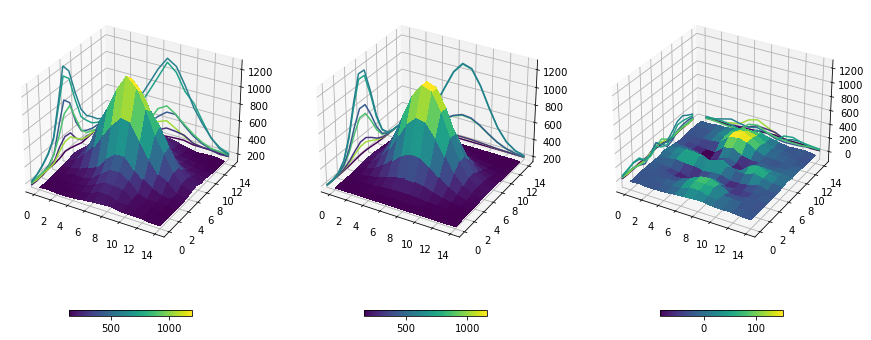

In [69]:
fig = plt.figure(figsize=(15, 7))

# surface_plot with color grading and color bar for the image
ax = fig.add_subplot(1, 3, 1, projection='3d')
p = ax.plot_surface(X, Y, im, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)
fig.colorbar(p, shrink=0.5, orientation='horizontal')

cset = ax.contour(X, Y, im, zdir='x', offset=-1, cmap=cm.viridis)
cset = ax.contour(X, Y, im, zdir='y', offset=im.shape[0]+1, cmap=cm.viridis)
ax.set_zlim(top=im.max())

# surface_plot with color grading and color bar for the Gaussian fit
ax = fig.add_subplot(1, 3, 2, projection='3d')
p = ax.plot_surface(X, Y, im_fit.reshape(14,14), rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)

cset = ax.contour(X, Y, im_fit.reshape(14,14), zdir='x', offset=-1, cmap=cm.viridis)
cset = ax.contour(X, Y, im_fit.reshape(14,14), zdir='y', offset=im.shape[0]+1, cmap=cm.viridis)
fig.colorbar(p, shrink=0.5, orientation='horizontal')
ax.set_zlim(top=im.max())

# surface_plot with color grading and color bar for the difference between the image and the fit
im_minus_fit = im - im_fit.reshape(14, 14)
ax = fig.add_subplot(1, 3, 3, projection='3d')
p = ax.plot_surface(X, Y, im_minus_fit, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)

cset = ax.contour(X, Y, im_minus_fit, zdir='x', offset=-1, cmap=cm.viridis)
cset = ax.contour(X, Y, im_minus_fit, zdir='y', offset=im_minus_fit.shape[0]+1, cmap=cm.viridis)
fig.colorbar(p, shrink=0.5, orientation='horizontal')
ax.set_zlim(top=im.max())



In [74]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

# rewrote the steps above as a function to avoid repetition
def plot_fit_projections_3D(im, ax):
    """Plots a surface based on input data as well as projections of the data along the x- and y-axis
    
    Parameters
    ----------
    im : ndarray
        Gaussian function evaluated with the given parameters
    ax : `~matplotlib.axes.Axes`
        axes to plot the surface in 
        
    """
    X, Y = np.meshgrid(np.linspace(0, im.shape[0], im.shape[0]), np.linspace(0, im.shape[1], im.shape[1]))
    p = ax.plot_surface(X, Y, im, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)
    plt.colorbar(p, shrink=0.5, orientation='horizontal')

    cset = ax.contour(X, Y, im, zdir='x', offset=-1, cmap=cm.viridis)
    cset = ax.contour(X, Y, im, zdir='y', offset=im.shape[0]+1, cmap=cm.viridis)
    ax.set_zlim(top=im.max())
    
    


(-122.3380761591585, 1284.0)

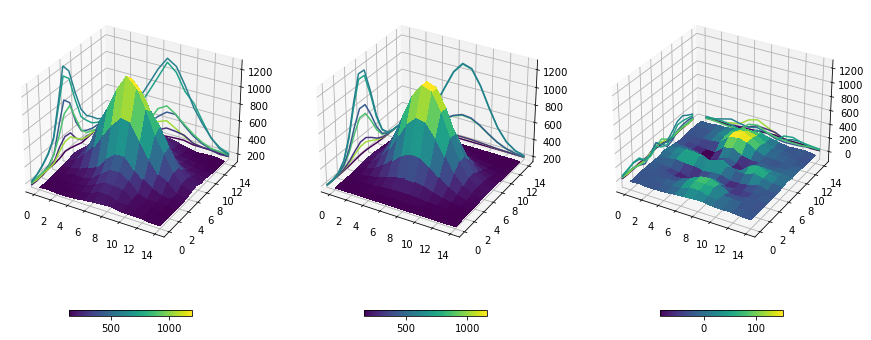

In [77]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1, 3, 1, projection='3d')
plot_fit_projections_3D(im, ax)
ax.set_zlim(top=im.max())

ax = fig.add_subplot(1, 3, 2, projection='3d')
plot_fit_projections_3D(im_fit.reshape(14,14), ax)
ax.set_zlim(top=im.max())

im_minus_fit = im - im_fit.reshape(14, 14)
ax = fig.add_subplot(1, 3, 3, projection='3d')
plot_fit_projections_3D(im_minus_fit, ax)
ax.set_zlim(top=im.max())



## Apply above visualization to several images

<ipython-input-27-8ff0ea87c075>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15, 7))


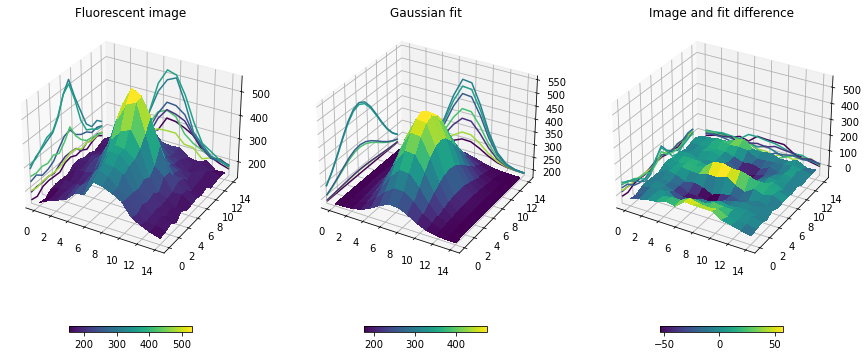

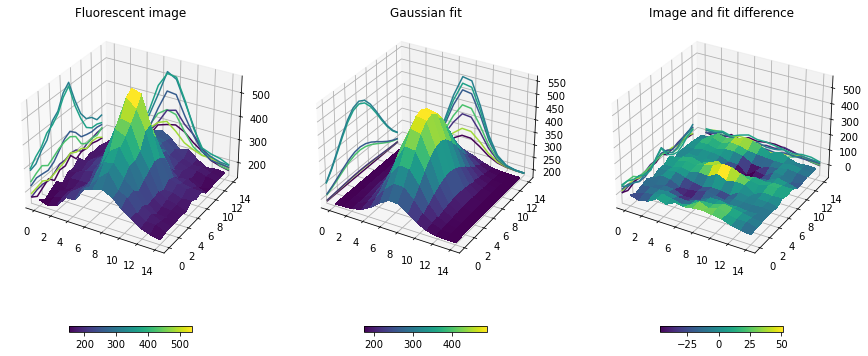

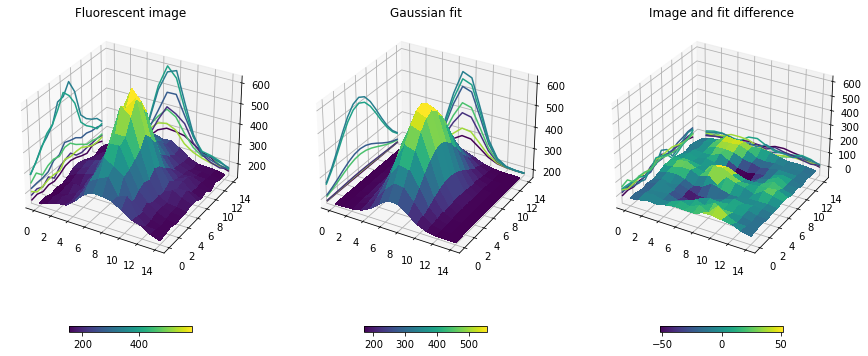

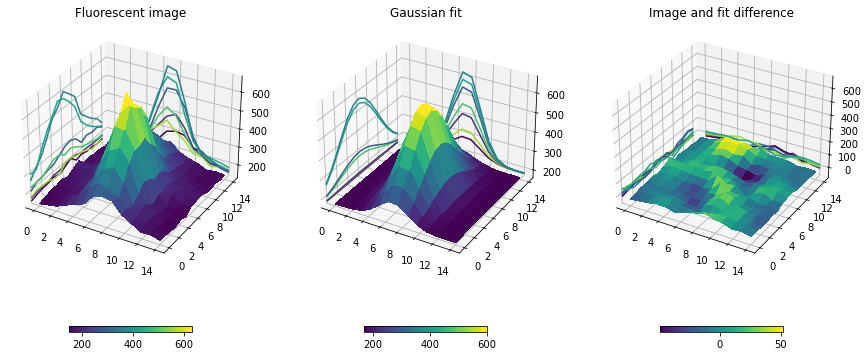

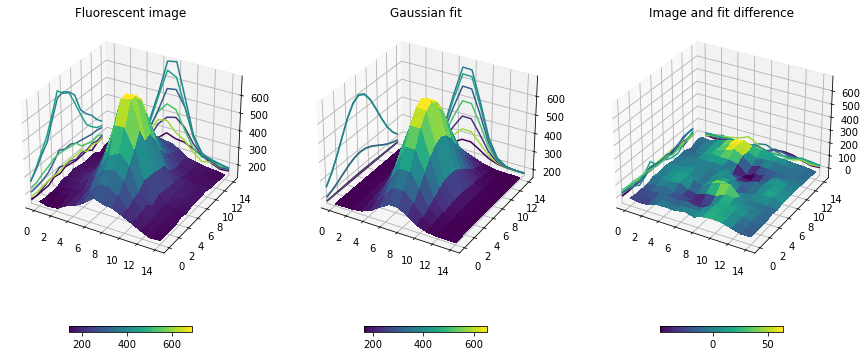

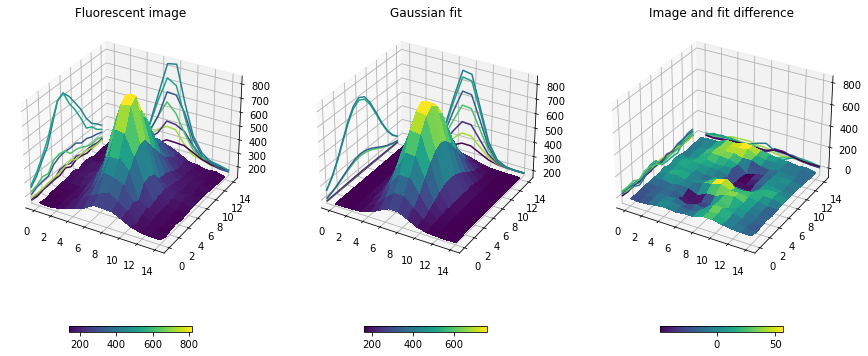

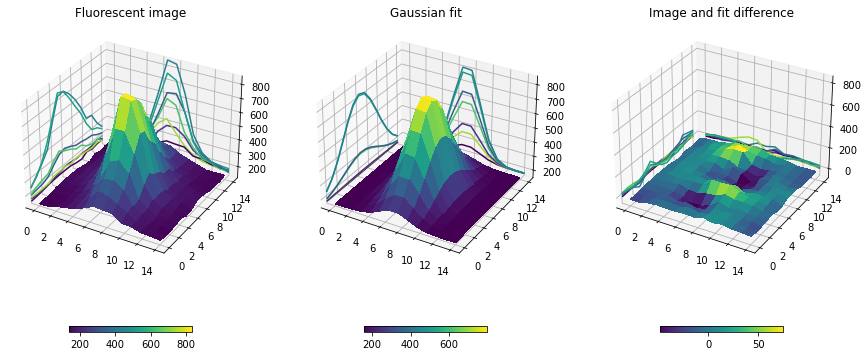

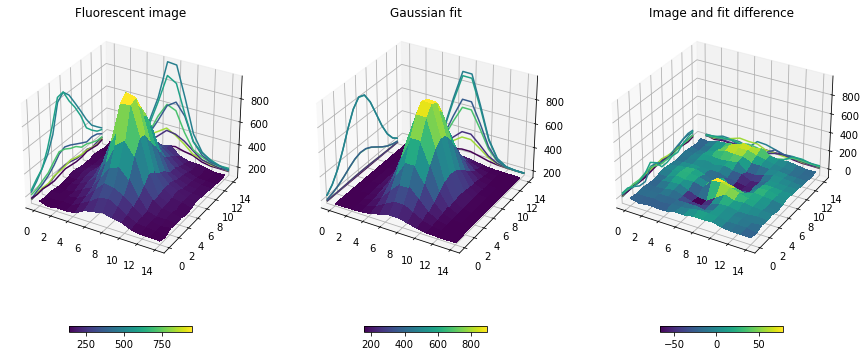

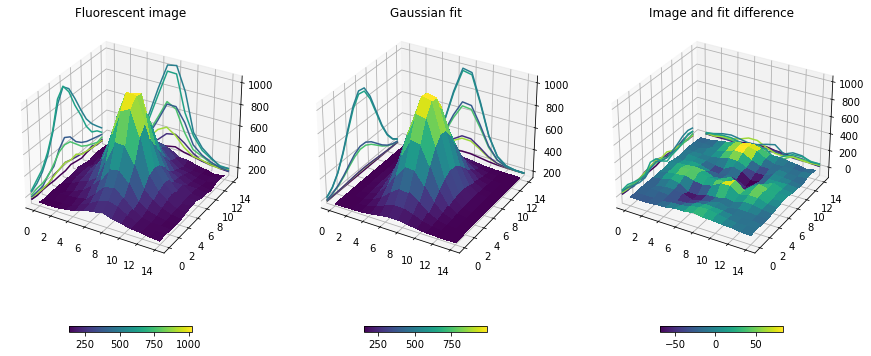

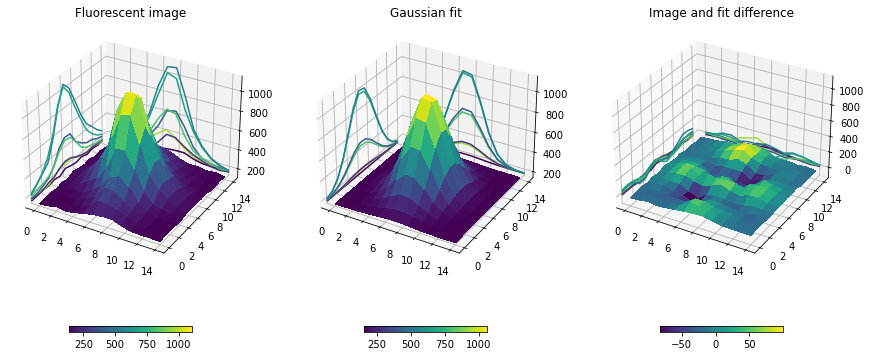

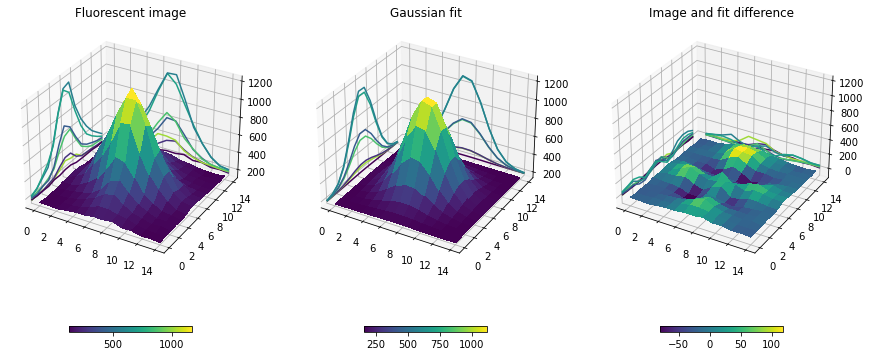

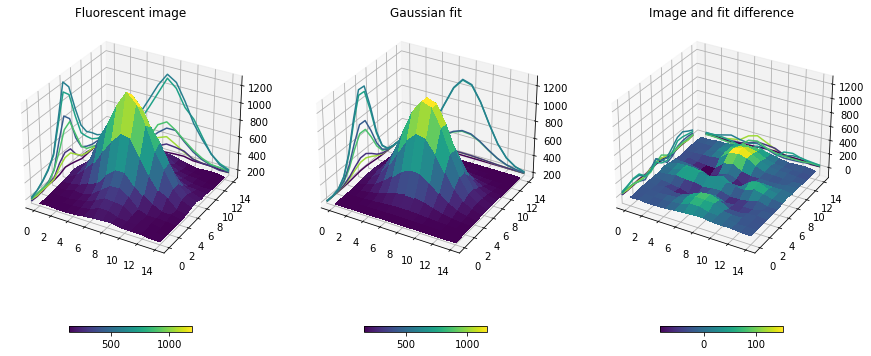

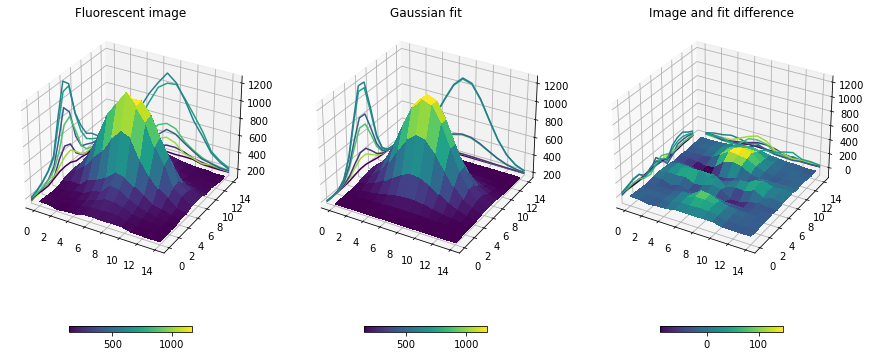

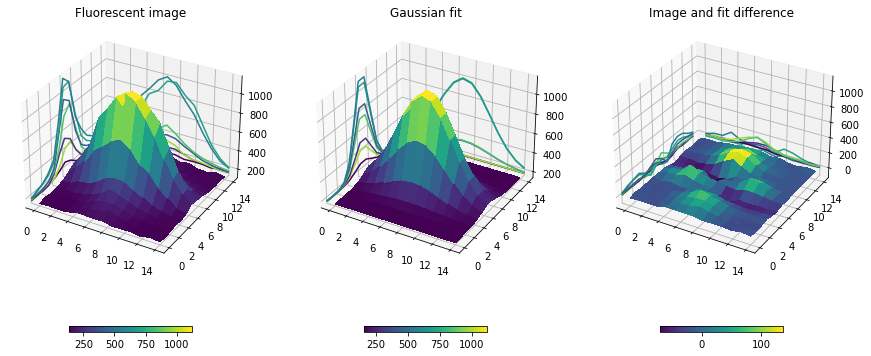

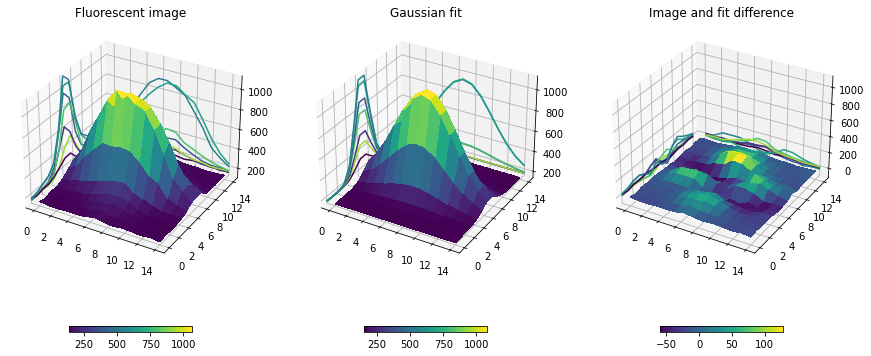

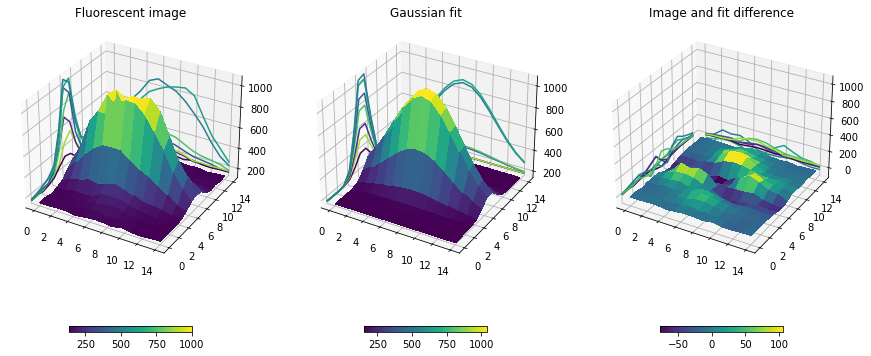

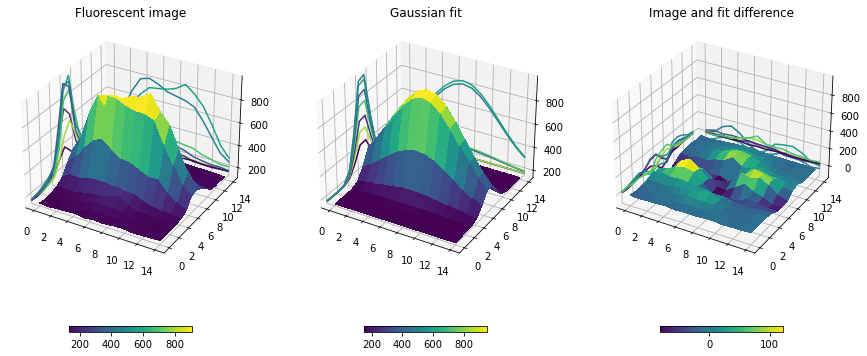

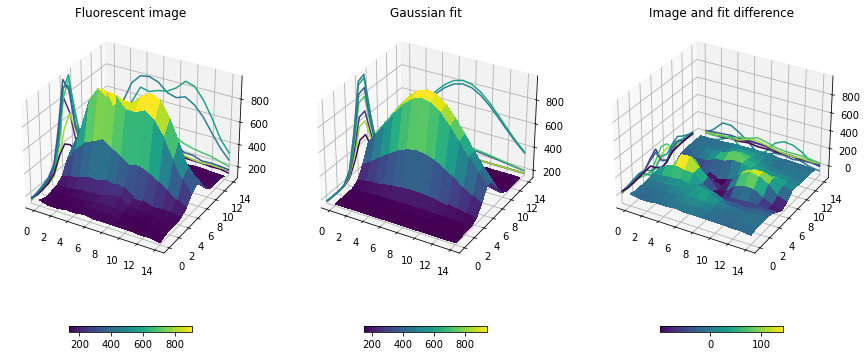

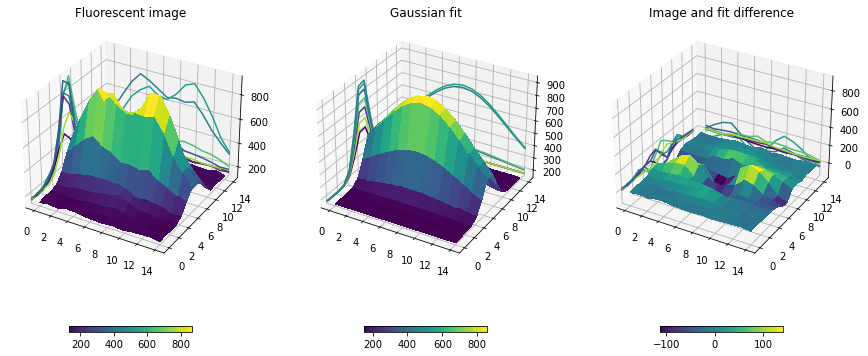

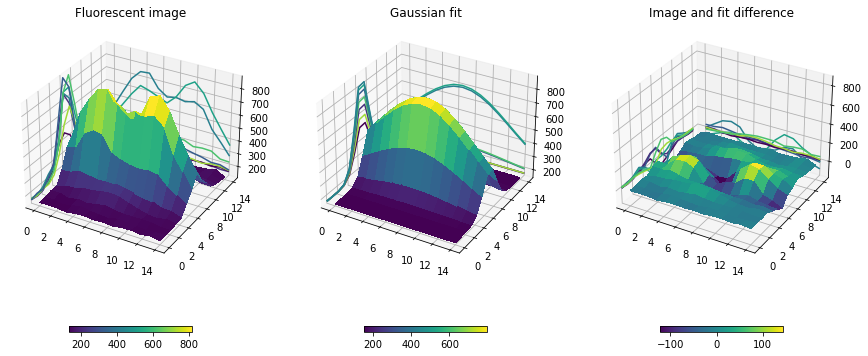

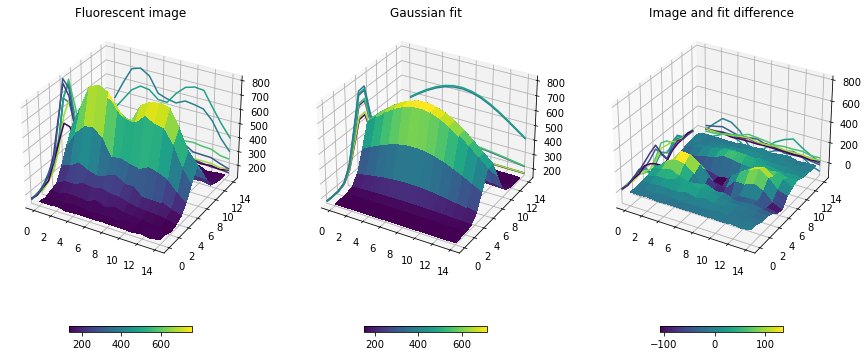

In [27]:
# Loop over several images in the data directory and visualize the results of the fit. The output directory with all
# resulting plots can be viewed in e.g. ImageJ. 

im_indices = np.arange(10, 31)
x0, y0 = 1085, 392

for i in im_indices:
    im = plt.imread("./zStack_3D/img_1" + str(i) + ".tif")
    im = im[y0-7:y0+7, x0-7:x0+7]
    
    X, Y = np.meshgrid(np.linspace(0, im.shape[0], im.shape[0]), np.linspace(0, im.shape[1], im.shape[1]))
    param_opt = getFitParam(im)
    im_fit = np.array(gaussian2DFit((X,Y), param_opt[0], param_opt[1], param_opt[2], param_opt[3], param_opt[4], param_opt[5]))
    im_minus_fit = im - im_fit.reshape(im.shape[0], im.shape[1])
    
    fig = plt.figure(figsize=(15, 7))
    ax = fig.add_subplot(1, 3, 1, projection='3d')
    plot_fit_projections_3D(im, ax)
    ax.set_zlim(top=im.max())
    ax.set_title("Fluorescent image")

    ax = fig.add_subplot(1, 3, 2, projection='3d')
    plot_fit_projections_3D(im_fit.reshape(14,14), ax)
    ax.set_zlim(top=im.max())
    ax.set_title("Gaussian fit")

    ax = fig.add_subplot(1, 3, 3, projection='3d')
    plot_fit_projections_3D(im_minus_fit, ax)
    ax.set_zlim(top=im.max())
    ax.set_title("Image and fit difference")
    
    plt.savefig("./output3D/img_fit3D_1" + str(i) + ".tif")
    plt.close(fig)

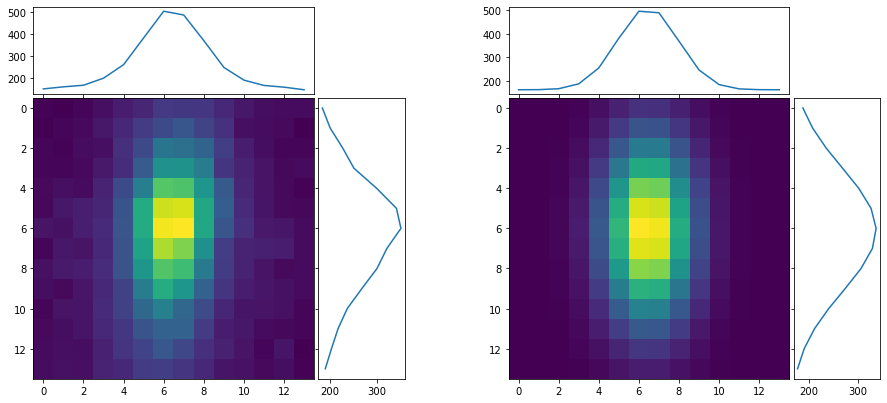

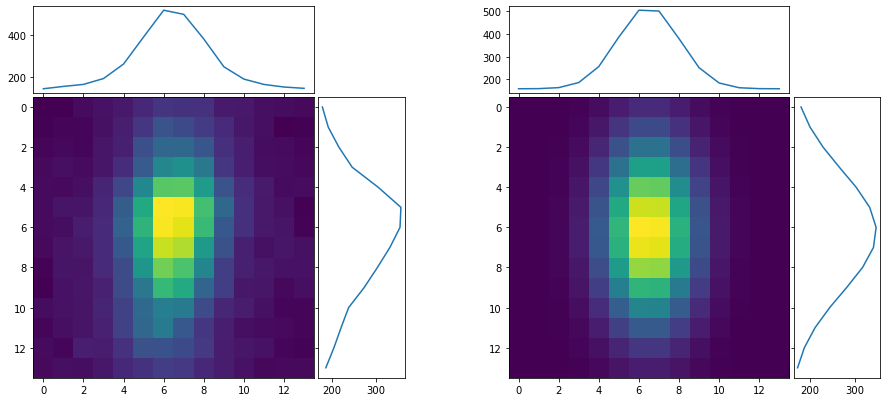

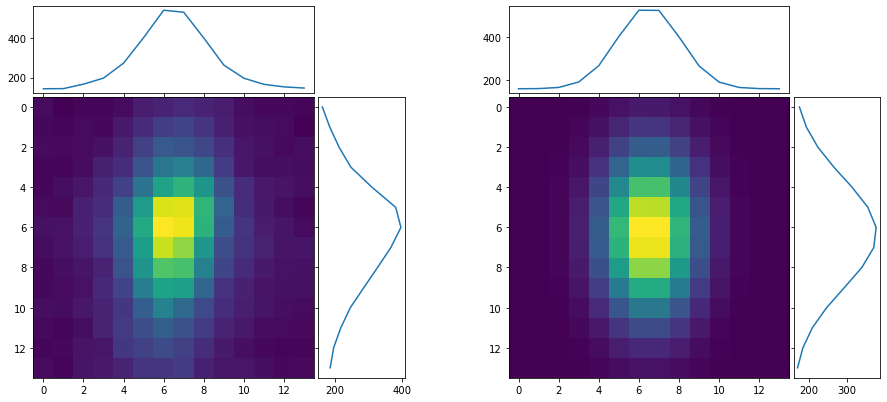

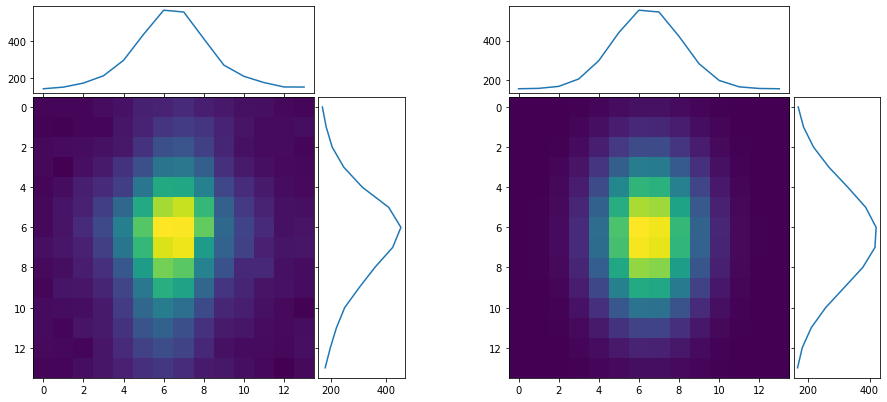

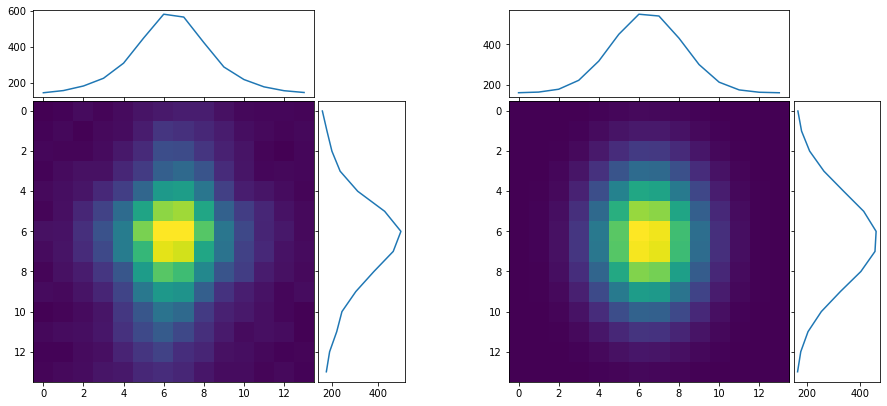

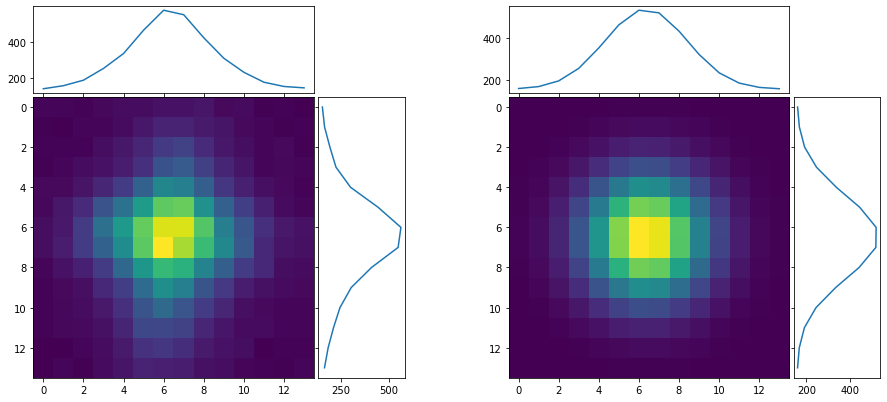

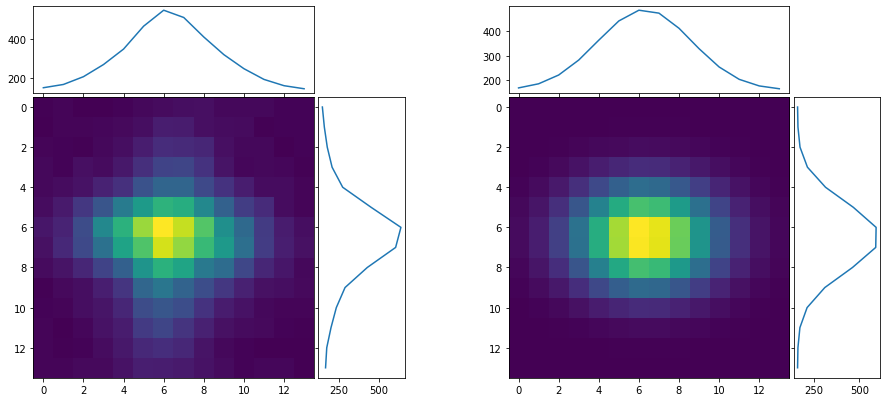

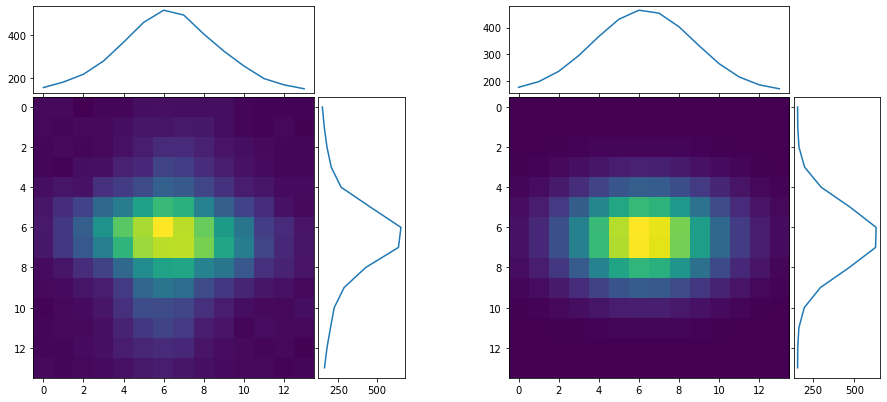

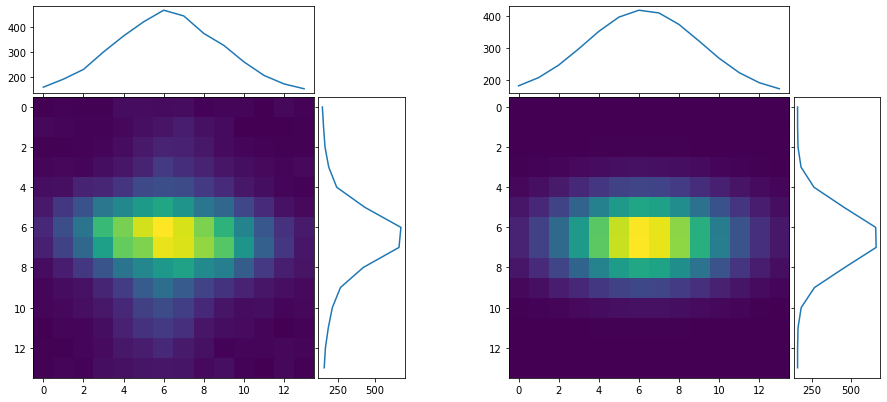

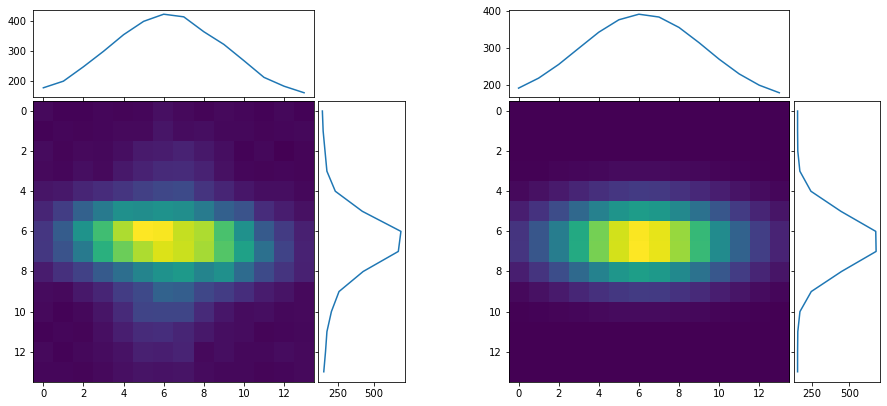

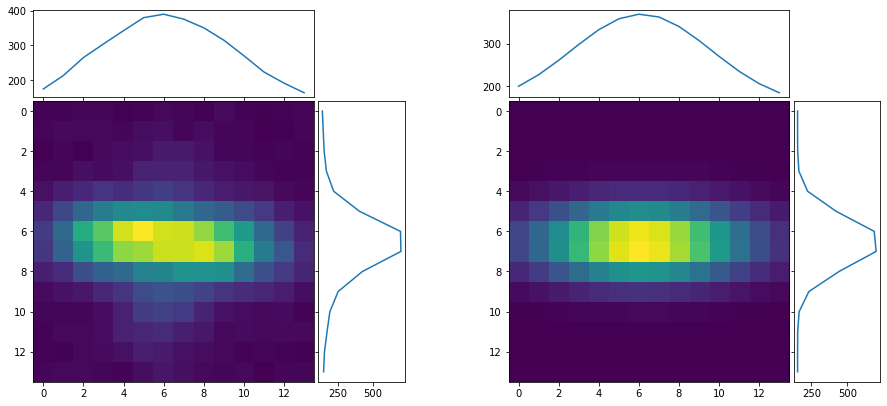

In [26]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
right = 1.2
spacing = 0.010 

im_indices = np.arange(15, 26)
x0, y0 = 1085, 392

for i in im_indices:
    im = plt.imread("./zStack_3D/img_1" + str(i) + ".tif")
    im = im[y0-7:y0+7, x0-7:x0+7]
    
    X, Y = np.meshgrid(np.linspace(0, im.shape[0], im.shape[0]), np.linspace(0, im.shape[1], im.shape[1]))
    param_opt = getFitParam(im)
    im_fit = np.array(gaussian2DFit((X,Y), param_opt[0], param_opt[1], param_opt[2], param_opt[3], param_opt[4], param_opt[5]))

    rect_mid = [left, bottom, width, height]
    rect_plotx = [left, bottom + height + spacing, width, 0.2]
    rect_ploty = [left + width + spacing, bottom, 0.2, height]

    fig = plt.figure(figsize=(6, 6))

    #plot the image
    ax = fig.add_subplot(1, 2, 1, position=rect_mid)
    ax_plotx = fig.add_axes(rect_plotx, sharex=ax)
    ax_ploty = fig.add_axes(rect_ploty, sharey=ax)

    ax = plot_fit_projections(im, ax, ax_plotx, ax_ploty)

    #plot the Gaussian fit of the image
    rect_mid = [right, bottom, width, height]
    rect_plotx = [right, bottom + height + spacing, width, 0.2]
    rect_ploty = [right + width + spacing, bottom, 0.2, height]

    ax = fig.add_subplot(1, 2, 2, position=rect_mid)
    ax_plotx = fig.add_axes(rect_plotx, sharex=ax)
    ax_ploty = fig.add_axes(rect_ploty, sharey=ax)

    ax = plot_fit_projections(im_fit.reshape(14,14), ax, ax_plotx, ax_ploty)

